# Harris Corner Detection

In [1]:
#importing the required packages for Harris Corner Detection
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def harris_corner_detection(image, k=0.04, threshold=0.01):
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate the image derivatives using Sobel filters
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=5)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=5)

    # Compute the elements of the Harris matrix
    Ix2 = Ix * Ix
    Iy2 = Iy * Iy
    Ixy = Ix * Iy
    # Apply Gaussian smoothing to the elements of the Harris matrix
    ksize = 5
    sigma = 1.5
    Ix2 = cv2.GaussianBlur(Ix2, (ksize, ksize), sigma)
    Iy2 = cv2.GaussianBlur(Iy2, (ksize, ksize), sigma)
    Ixy = cv2.GaussianBlur(Ixy, (ksize, ksize), sigma)
    # Calculate the Harris response
    det_M = Ix2 * Iy2 - Ixy * Ixy
    trace_M = Ix2 + Iy2
    harris_response = det_M - k * (trace_M ** 2)
    # Threshold the Harris response to find corners
    corners = np.where(harris_response > threshold * harris_response.max())
    return corners


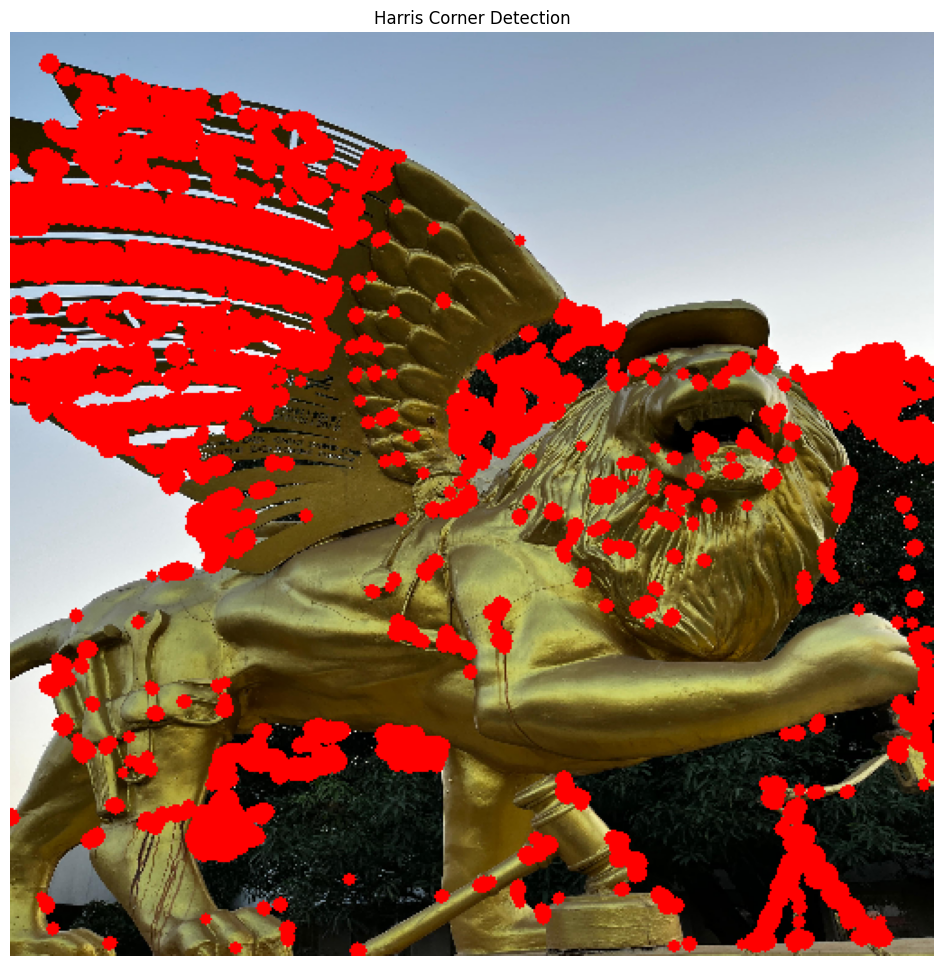

In [3]:
# Load the input image
input_image = cv2.imread('Lion.png')

# Perform Harris Corner Detection
corners = harris_corner_detection(input_image)

#Draw the corners on the original image
for pt in zip(*corners[::-1]):
    cv2.circle(input_image, pt, 3, (0, 0, 255), -1)


#Convert BGR image to RGB for displaying with Matplotlib
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)
# Display the image with detected corners
plt.figure(figsize=(12, 12))
plt.imshow(input_image_rgb)
plt.title('Harris Corner Detection')
plt.axis('off')
plt.show()
